In [1]:
"""
Chapter_2.3.2. Demonstration of k-means assumptions
参考
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
plt.figure(figsize=(12, 12))

In [3]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

print(X[0:3,])
print(X.shape)
print(y[0:20,])
print(y.shape)

[[ -5.19811282   0.64186932]
 [ -5.75229538   0.41862711]
 [-10.84489837  -7.55352273]]
(1500, 2)
[1 1 0 1 1 2 0 0 0 2 2 2 0 2 0 1 2 2 0 0]
(1500,)


In [4]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

print(y_pred.shape)

(1500,)


In [5]:
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [6]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

print(transformation)
print(X_aniso.shape)
print(y_pred.shape)

[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
(1500, 2)
(1500,)


In [7]:
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

In [8]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

print(X_varied.shape)
print(y_varied.shape)
print(y_pred.shape)

(1500, 2)
(1500,)
(1500,)


In [9]:
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

In [10]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

print(X_filtered.shape)
print(y_pred.shape)

(610, 2)
(610,)


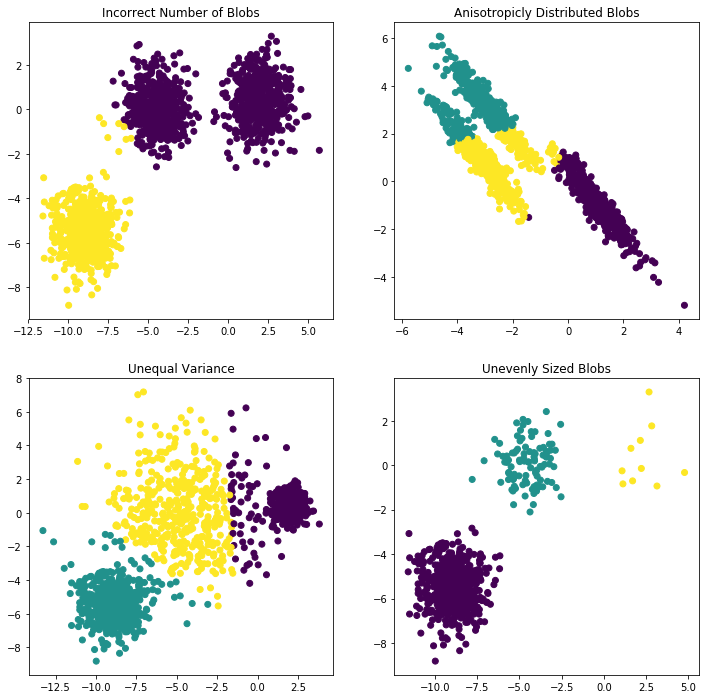

In [11]:
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()